<h2>Скачиваем набор данных

In [ ]:
# Install kaggle
!pip install -q kaggle

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory for kaggle JSON
import os
os.chdir("/content/drive/MyDrive/files")

In [ ]:
# Create a kaggle folder
!mkdir -p ~/.kaggle

# Copy kaggle.json to created folder
!cp kaggle.json ~/.kaggle/

In [ ]:
os.chdir("/content")

In [ ]:
# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the required dataset
!kaggle datasets download -d raddar/chest-xrays-indiana-university

100% 13.1G/13.2G [02:38<00:00, 66.3MB/s]
100% 13.2G/13.2G [02:38<00:00, 89.0MB/s]


In [ ]:
# Unzip our dataset
from zipfile import ZipFile
from tqdm import tqdm


file_to_extract = "chest-xrays-indiana-university.zip"

# Open your .zip file
with ZipFile(file=file_to_extract) as zip_file:

    # Loop over each file and extract them
    for file in tqdm(iterable=zip_file.namelist(), total=len(zip_file.namelist())):
        zip_file.extract(member=file)

100%|██████████| 7472/7472 [02:35<00:00, 48.20it/s]


In [ ]:
!ls

chest-xrays-indiana-university.zip  images		     indiana_reports.csv
drive				    indiana_projections.csv  sample_data


<h2> Чтение данных

In [ ]:
import pandas as pd

In [ ]:
report_df = pd.read_csv("indiana_reports.csv")
report_df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [ ]:
projections_df = pd.read_csv("indiana_projections.csv")
projections_df.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


<h2>Предобработка данных

Проверка на Null

In [ ]:
report_df.isnull().sum()

uid             0
MeSH            0
Problems        0
image           0
indication     86
comparison    599
findings      514
impression     31
dtype: int64

In [ ]:
projections_df.isnull().sum()

uid           0
filename      0
projection    0
dtype: int64

Выполним замену пустых значений

In [ ]:
# report_df["indication"] = report_df["indication"].fillna("No Indication")
# report_df["comparison"] = report_df["comparison"].fillna("No Comparison")
# report_df["findings"] = report_df["findings"].fillna("No Findings")
# report_df["impression"] = report_df["impression"].fillna("No Impression")

<h2> Объединим две таблицы в одну

In [ ]:
merged_df = pd.merge(report_df, projections_df, on="uid")
merged_df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png,Frontal
1,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-3001.dcm.png,Lateral
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-1001.dcm.png,Frontal
3,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-2001.dcm.png,Lateral
4,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p...",3_IM-1384-1001.dcm.png,Frontal


In [ ]:
merged_df = merged_df[merged_df["findings"].notnull()]
merged_df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png,Frontal
1,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-3001.dcm.png,Lateral
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-1001.dcm.png,Frontal
3,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-2001.dcm.png,Lateral
6,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,4_IM-2050-1001.dcm.png,Frontal


In [ ]:
merged_df.shape

(6469, 10)

<h2>Чистка данных

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup
# nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Уберем сокращения

In [ ]:
def decontraction(doc):
    docs = re.sub(r"won't", "will not", doc)
    docs = re.sub(r"can\'t", "can not", docs)
    docs = re.sub(r"n\'t", " not", docs)
    docs = re.sub(r"\'t", " not", docs)
    docs = re.sub(r"\'re", " are", docs)
    docs = re.sub(r"\'s", " is", docs)
    docs = re.sub(r"\'d", " would", docs)
    docs = re.sub(r"\'ve", " have", docs)
    docs = re.sub(r"\'ll", " will", docs)
    docs = re.sub(r"\'m", " am", docs)
    docs = re.sub(r"\*+", "abuse", docs)
    return docs

Удалим стоп-слова

In [ ]:
# def remove_stopwords(data):
#     all_stopwords = stopwords.words('english')
#     all_stopwords.remove('not')
#     all_stopwords.remove('no')

#     # tokenizing the sentence into word
#     text_tokens = word_tokenize(data)
#     tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
#     return " ".join(tokens_without_sw)

In [ ]:
def text_preprocess(data):
    clean_text=[]
    for i in (data.values):
        text = BeautifulSoup(i, 'lxml').get_text()  # ?

        # making the text in lower case
        text = text.lower()

        # removing the special character in text
        text = re.sub(r"[|\'||\||/|?|$|.|.|,||;|><!&)(:`\n\t@#=+%^*~-]","",text)

        # Removing the irrelavent XXXX words
        text = re.sub(r'x+', "", text)
        # text = re.sub(r"xxxx", "", text)
        # text = re.sub(r'xxx', "", text)
        # text = re.sub(r'xx', "", text)

        # Removing the numbers in text
        text = re.sub(r'[0-9]', "", text)
        text = re.sub(r"yearold", "", text)
        text = re.sub('\s+', ' ', text)

        # Removing apoustahe
        text = re.sub("'", '', text)

        # Removing multiple full stop
        text = re.sub(r'\.\.+', '.', text)
        text = re.sub(r'  ', "", text)

        text = decontraction(text)
        text = remove_stopwords(text)
        clean_text.append(text)
    return clean_text

In [ ]:
# 2nd edition. Tried as main

def text_preprocess(data):
    text = str(data)

    # making the text in lower case
    text = text.lower()

    # removing the special character in text
    text = re.sub(r"[|\'||\||/|?|$|.|.|,||;|><!&)(:`\n\t@#=+%^*~-]","",text)

    # Removing the irrelavent XXXX words
    text = re.sub(r'x+', "", text)

    # Removing the numbers in text
    text = re.sub(r'[0-9]', "", text)
    text = re.sub(r"yearold", "", text)
    text = re.sub('\s+', " ", text)

    # Removing apoustahe
    text = re.sub("'", "", text)

    # Removing multiple full stop
    text = re.sub(r'\.\.+', '.', text)
    text = re.sub(r'  ', "", text)

    text = decontraction(text)

    return text

Применим все действия по предобработке текста к нашему набору данных

In [ ]:
report_df["comparison"] = text_preprocess(report_df["comparison"])
report_df["image"] = text_preprocess(report_df["image"])
report_df["indication"] = text_preprocess(report_df["indication"])
report_df["findings"] = text_preprocess(report_df["findings"])
report_df["impression"] = text_preprocess(report_df["impression"])

<ipython-input-62-792b14fa2d95>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(i, 'lxml').get_text()  # ?


In [ ]:
# Tried as main
merged_df["indication"] = merged_df["indication"].apply(lambda x: text_preprocess(x))
merged_df["findings"] = merged_df["findings"].apply(lambda x: text_preprocess(x))
merged_df["impression"] = merged_df["impression"].apply(lambda x: text_preprocess(x))

In [ ]:
merged_df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
0,1,normal,normal,Xray Chest PA and Lateral,positive tb test,None.,the cardiac silhouette and mediastinum size ar...,normal chest,1_IM-0001-4001.dcm.png,Frontal
1,1,normal,normal,Xray Chest PA and Lateral,positive tb test,None.,the cardiac silhouette and mediastinum size ar...,normal chest,1_IM-0001-3001.dcm.png,Lateral
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",preop bariatric surgery,None.,borderline cardiomegaly midline sternotomy enl...,no acute pulmonary findings,2_IM-0652-1001.dcm.png,Frontal
3,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",preop bariatric surgery,None.,borderline cardiomegaly midline sternotomy enl...,no acute pulmonary findings,2_IM-0652-2001.dcm.png,Lateral
6,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",with,None available,there are diffuse bilateral interstitial and a...,bullous emphysema and interstitial fibrosis p...,4_IM-2050-1001.dcm.png,Frontal


Сохраним объединенный набор данных

In [ ]:
merged_df.to_pickle("/content/drive/MyDrive/shikha version/data/merged_df.pkl")

In [ ]:
report_df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,positive tb test,None.,the cardiac silhouette and mediastinum size ar...,normal chest
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",preop bariatric surgery,None.,borderline cardiomegaly midline sternotomy enl...,no acute pulmonary findings
2,3,normal,normal,Xray Chest PA and Lateral,rib pain after a steps this pain to r back r e...,NaN,nan,no displaced rib fractures pneumothora or pleu...
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",with,None available,there are diffuse bilateral interstitial and a...,bullous emphysema and interstitial fibrosis p...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,chest and nasal congestion,NaN,the cardiomediastinal silhouette and pulmonary...,no acute cardiopulmonary abnormality


<h1> EDA (Extrapolary Data Analysis)

<h2> Indication

Анализ уникальности

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

Number of unique indications  in the dataset: 2151
Number of indications that repeated more than one times: 206



<BarContainer object of 1 artists>

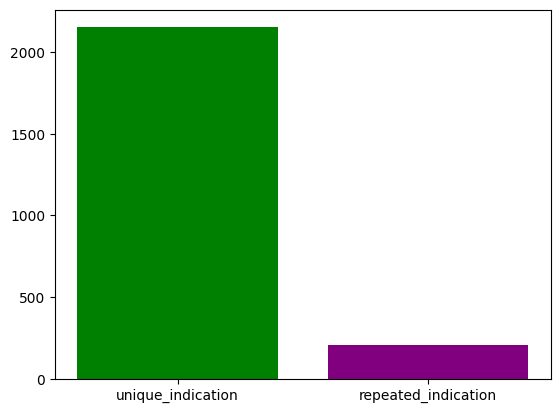

In [ ]:
indication_reports = pd.Series(report_df["indication"].tolist())
len_indication = len(indication_reports)

unique_indication_report = len(np.unique(indication_reports))
print(f"Number of unique indications  in the dataset: {unique_indication_report}")

repeated_indication_report = np.sum(indication_reports.value_counts() > 1)
print(f"Number of indications that repeated more than one times: {repeated_indication_report}")
print()

plt.bar(["unique_indication"], unique_indication_report, color='green')
plt.bar(["repeated_indication"], repeated_indication_report, color='purple' )

Из приведенной выше гистограммы признаков для "Indication" можно сделать вывод, что всего в наборе данных 207 повторяющихся предложений и 1932 - уникальных

Построим график для 50 наиболее повторяющихся предложений

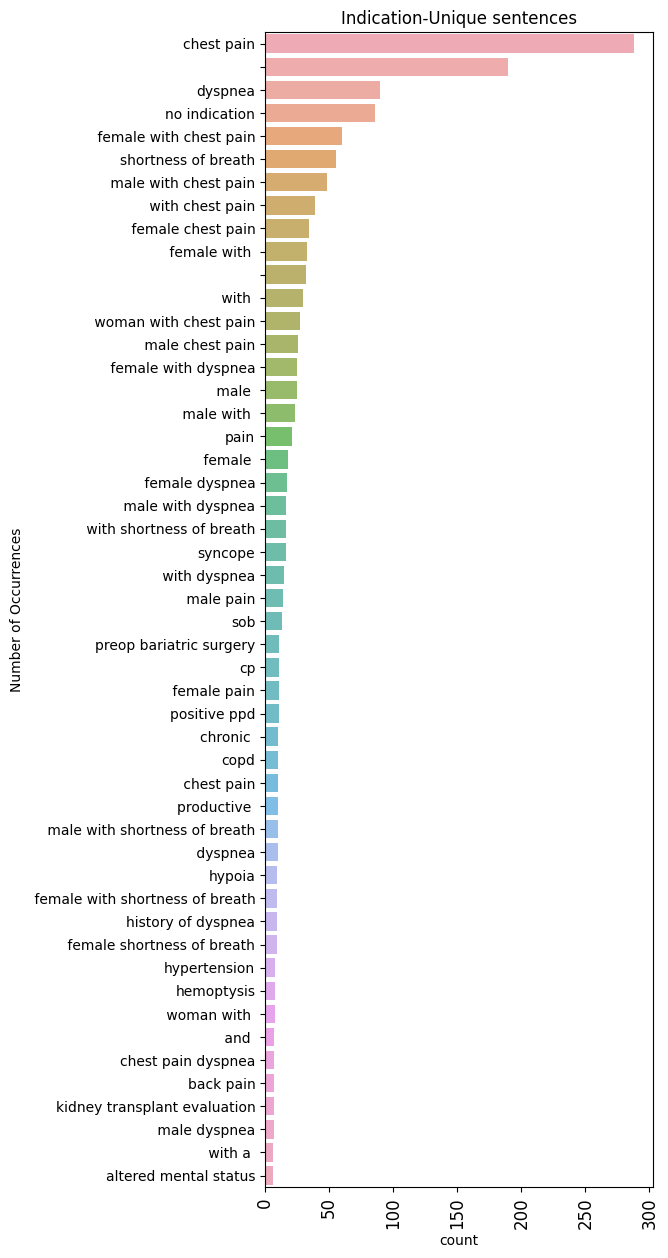

In [ ]:
sentences = report_df["indication"].value_counts()[:50].reset_index()
sentences.columns = ["indication", "count"]

plt.figure(figsize=(5, 15))
sns.barplot(data=sentences, y="indication", x="count", alpha=0.8, orient="h")
plt.ylabel("Number of Occurrences", fontsize=10)
plt.xticks(fontsize="large", rotation=90)
plt.title("Indication-Unique sentences")
plt.show()

Построим WordCloud

In [ ]:
def show_wordcloud(data, title=None):
    wordcloud = WordCloud(background_color="black",
                          max_words=700,
                          max_font_size=40,
                          scale=3,
                          random_state=1,
                          colormap="Set3"
                          )

    wordcloud = wordcloud.generate(" ".join(data.astype(str)))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation="Bilinear")
    plt.show()

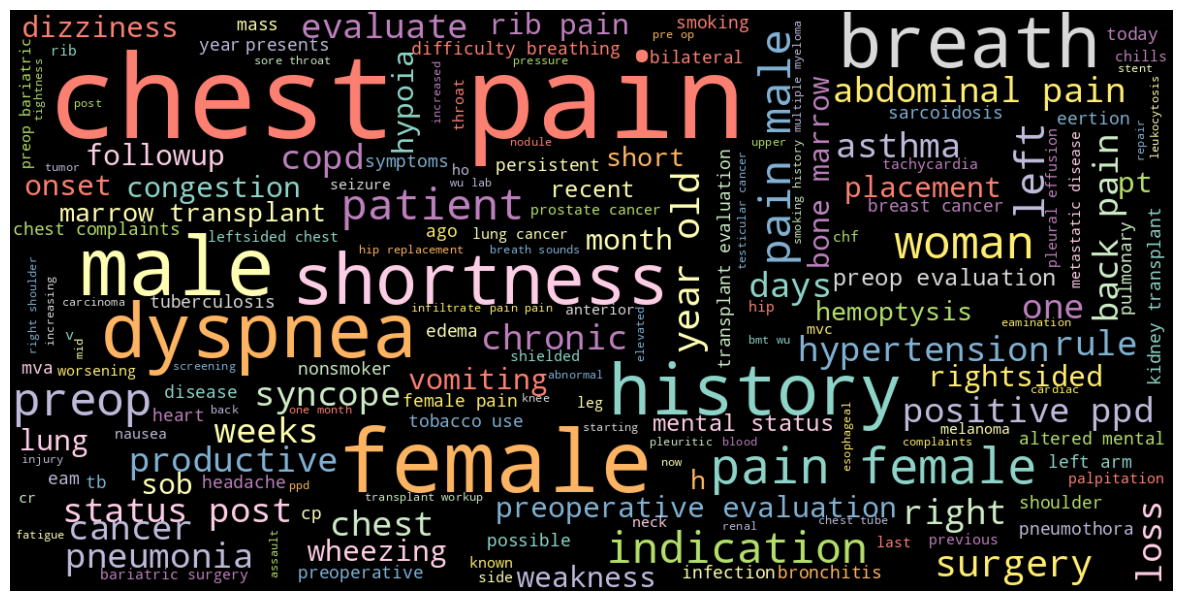

In [ ]:
show_wordcloud(report_df["indication"])

Из wordcloud: chest pain, shortness breath, indication, dyspnea самые важные и частовстречающиеся слова

<h2>Findings

Анализ уникальности

Number of unique findings in the dataset: 2547
Number of findings that repeated more than one times: 144



<BarContainer object of 1 artists>

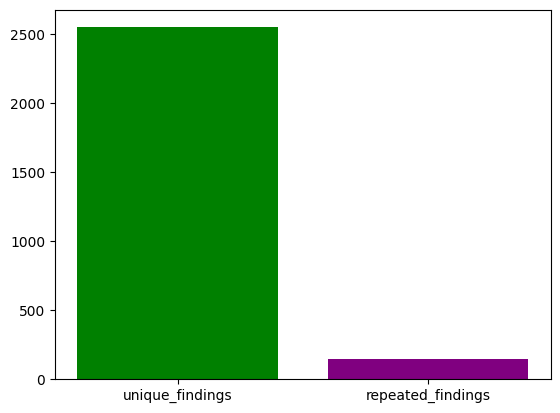

In [ ]:
findings_reports = pd.Series(report_df["findings"].tolist())
len_findings = len(findings_reports)

unique_findings_report = len(np.unique(findings_reports))
print(f"Number of unique findings in the dataset: {unique_findings_report}")

repeated_findings_report = np.sum(findings_reports.value_counts() > 1)
print(f"Number of findings that repeated more than one times: {repeated_findings_report}")
print()

plt.bar(["unique_findings"], unique_findings_report, color='green')
plt.bar(["repeated_findings"], repeated_findings_report, color='purple' )

Из приведенной выше гистограммы признаков для "Findings" можно сделать вывод, что всего в наборе данных 148 повторяющихся предложений и 2520 - уникальных

Построим график для 50 наиболее повторяющихся предложений

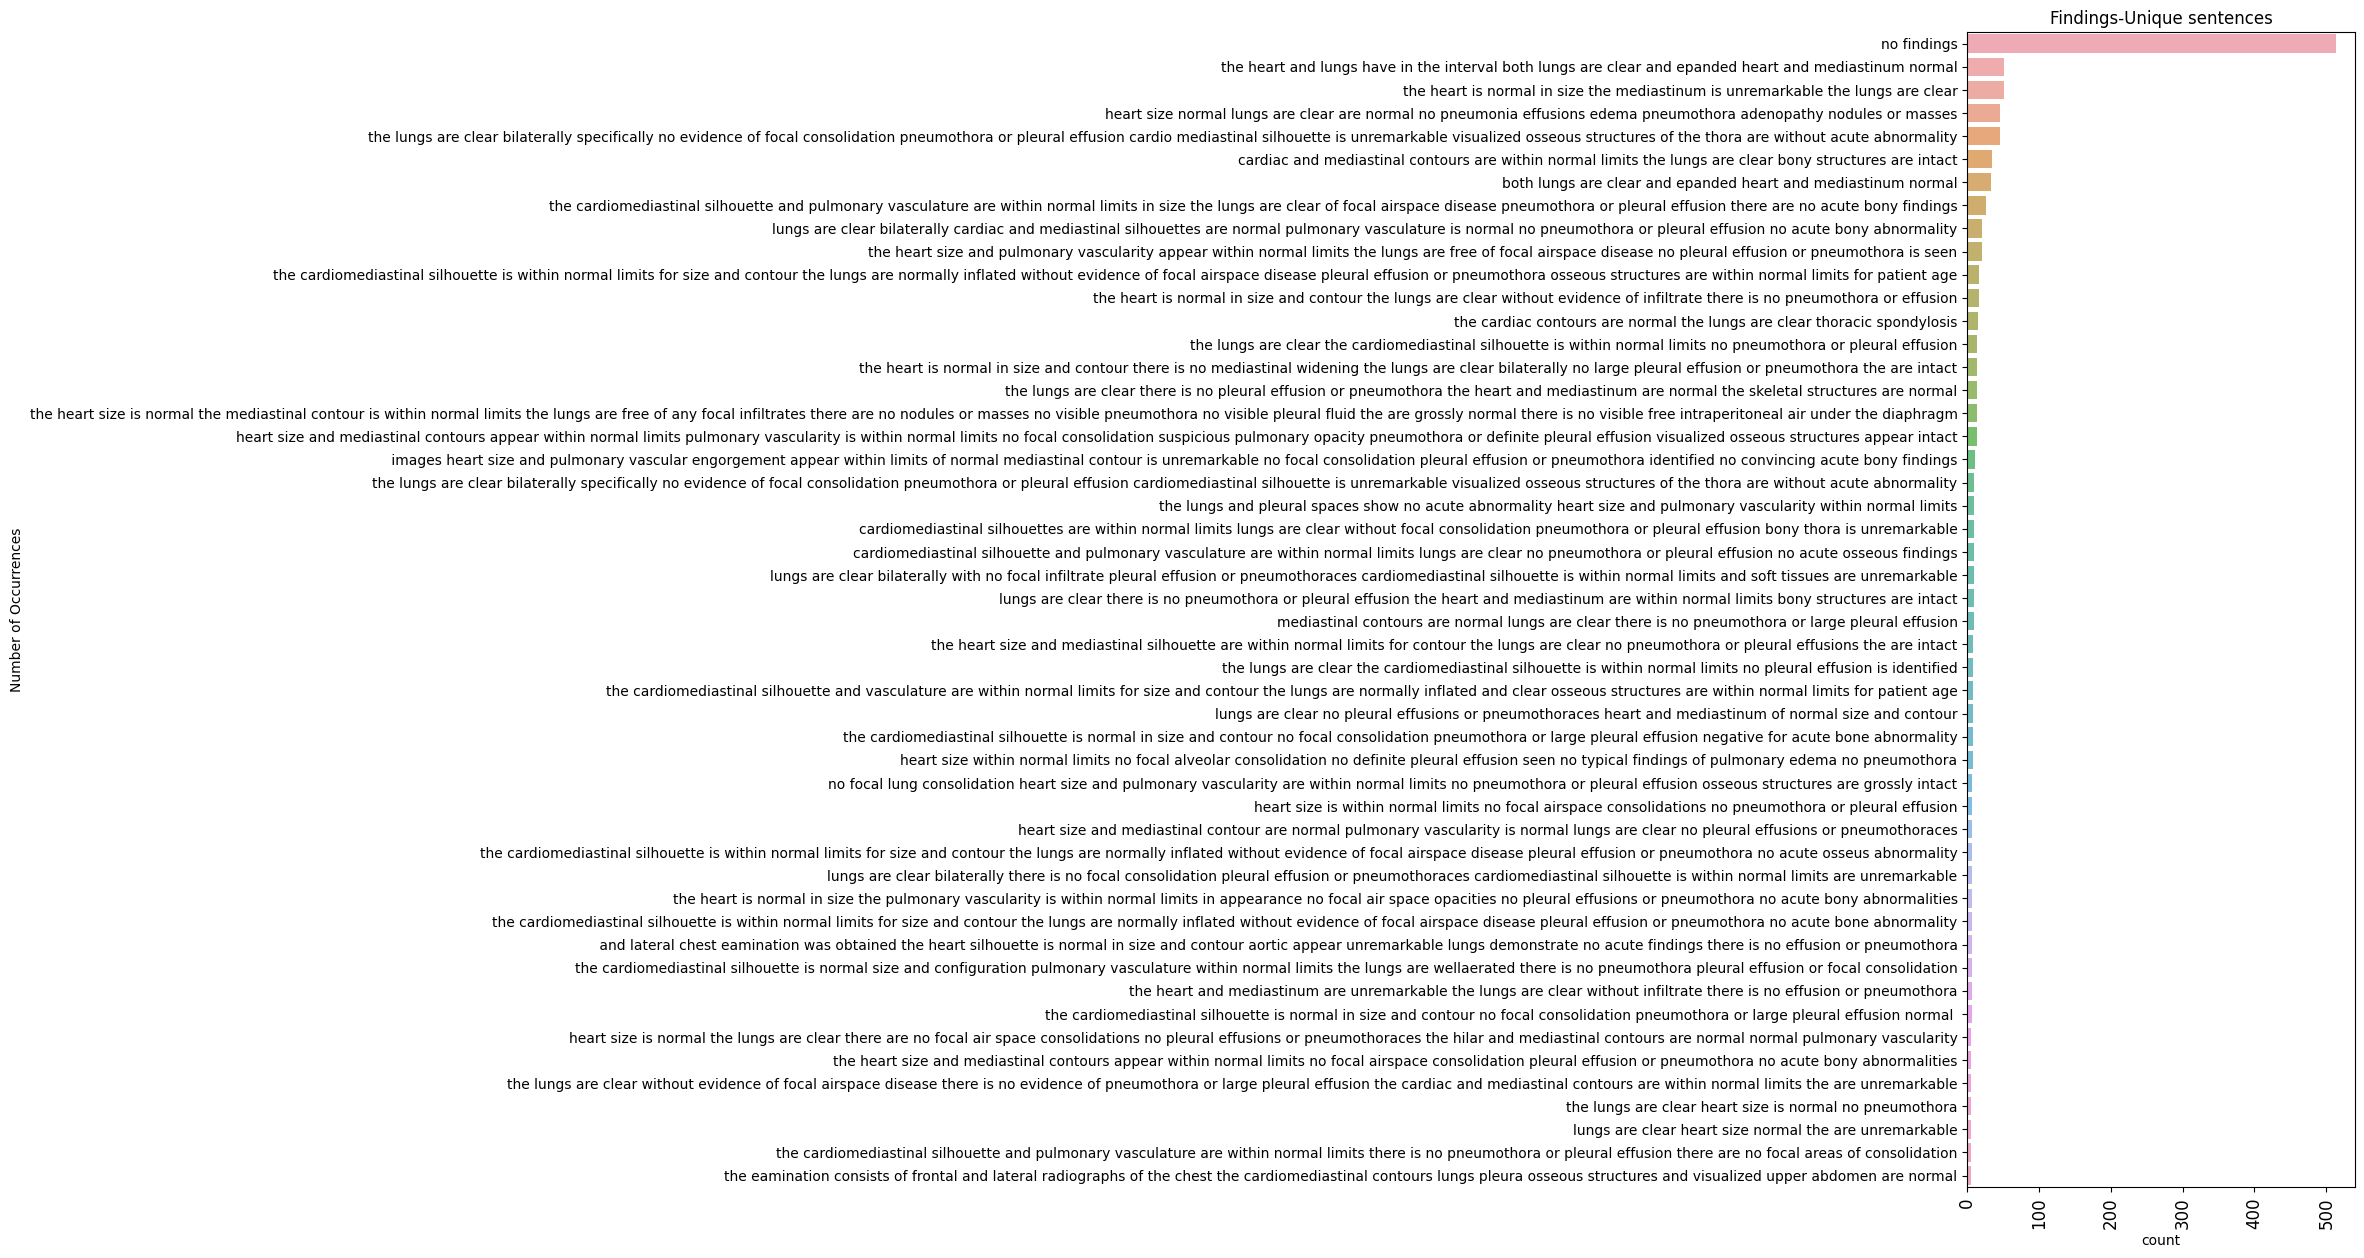

In [ ]:
sentences = report_df["findings"].value_counts()[:50].reset_index()
sentences.columns = ["findings", "count"]

plt.figure(figsize=(5, 15))
sns.barplot(data=sentences, y="findings", x="count", alpha=0.8, orient="h")
plt.ylabel("Number of Occurrences", fontsize=10)
plt.xticks(fontsize="large", rotation=90)
plt.title("Findings-Unique sentences")
plt.show()

Построим WordCloud

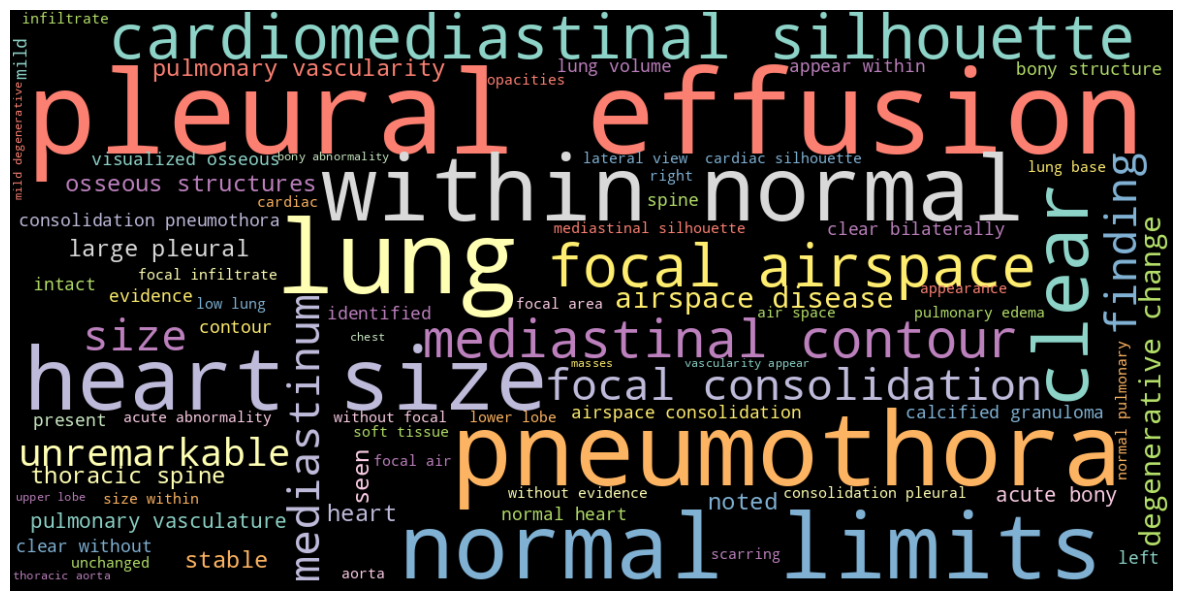

In [ ]:
show_wordcloud(report_df["findings"])

Из wordcloud: cleural effusion, cardiomediastinal silhouette, within normal, lungs clear самые важные и частовстречающиеся слова

<h2>Impression

Анализ уникальности

Number of unique impression in the dataset: 1726
Number of impression that repeated more than one times: 141



<BarContainer object of 1 artists>

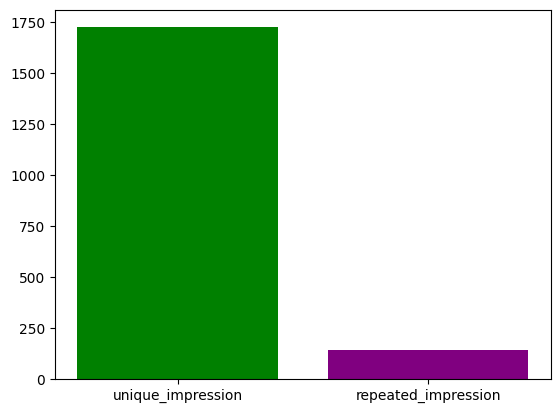

In [ ]:
impression_reports = pd.Series(report_df["impression"].tolist())
len_impression = len(impression_reports)

unique_impression_report = len(np.unique(impression_reports))
print(f"Number of unique impression in the dataset: {unique_impression_report}")

repeated_impression_report = np.sum(impression_reports.value_counts() > 1)
print(f"Number of impression that repeated more than one times: {repeated_impression_report}")
print()

plt.bar(["unique_impression"], unique_impression_report, color='green')
plt.bar(["repeated_impression"], repeated_impression_report, color='purple' )

Из приведенной выше гистограммы признаков для "Impression" можно сделать вывод, что всего в наборе данных 118 повторяющихся предложений и 1670 - уникальных

Построим график для 50 наиболее повторяющихся предложений

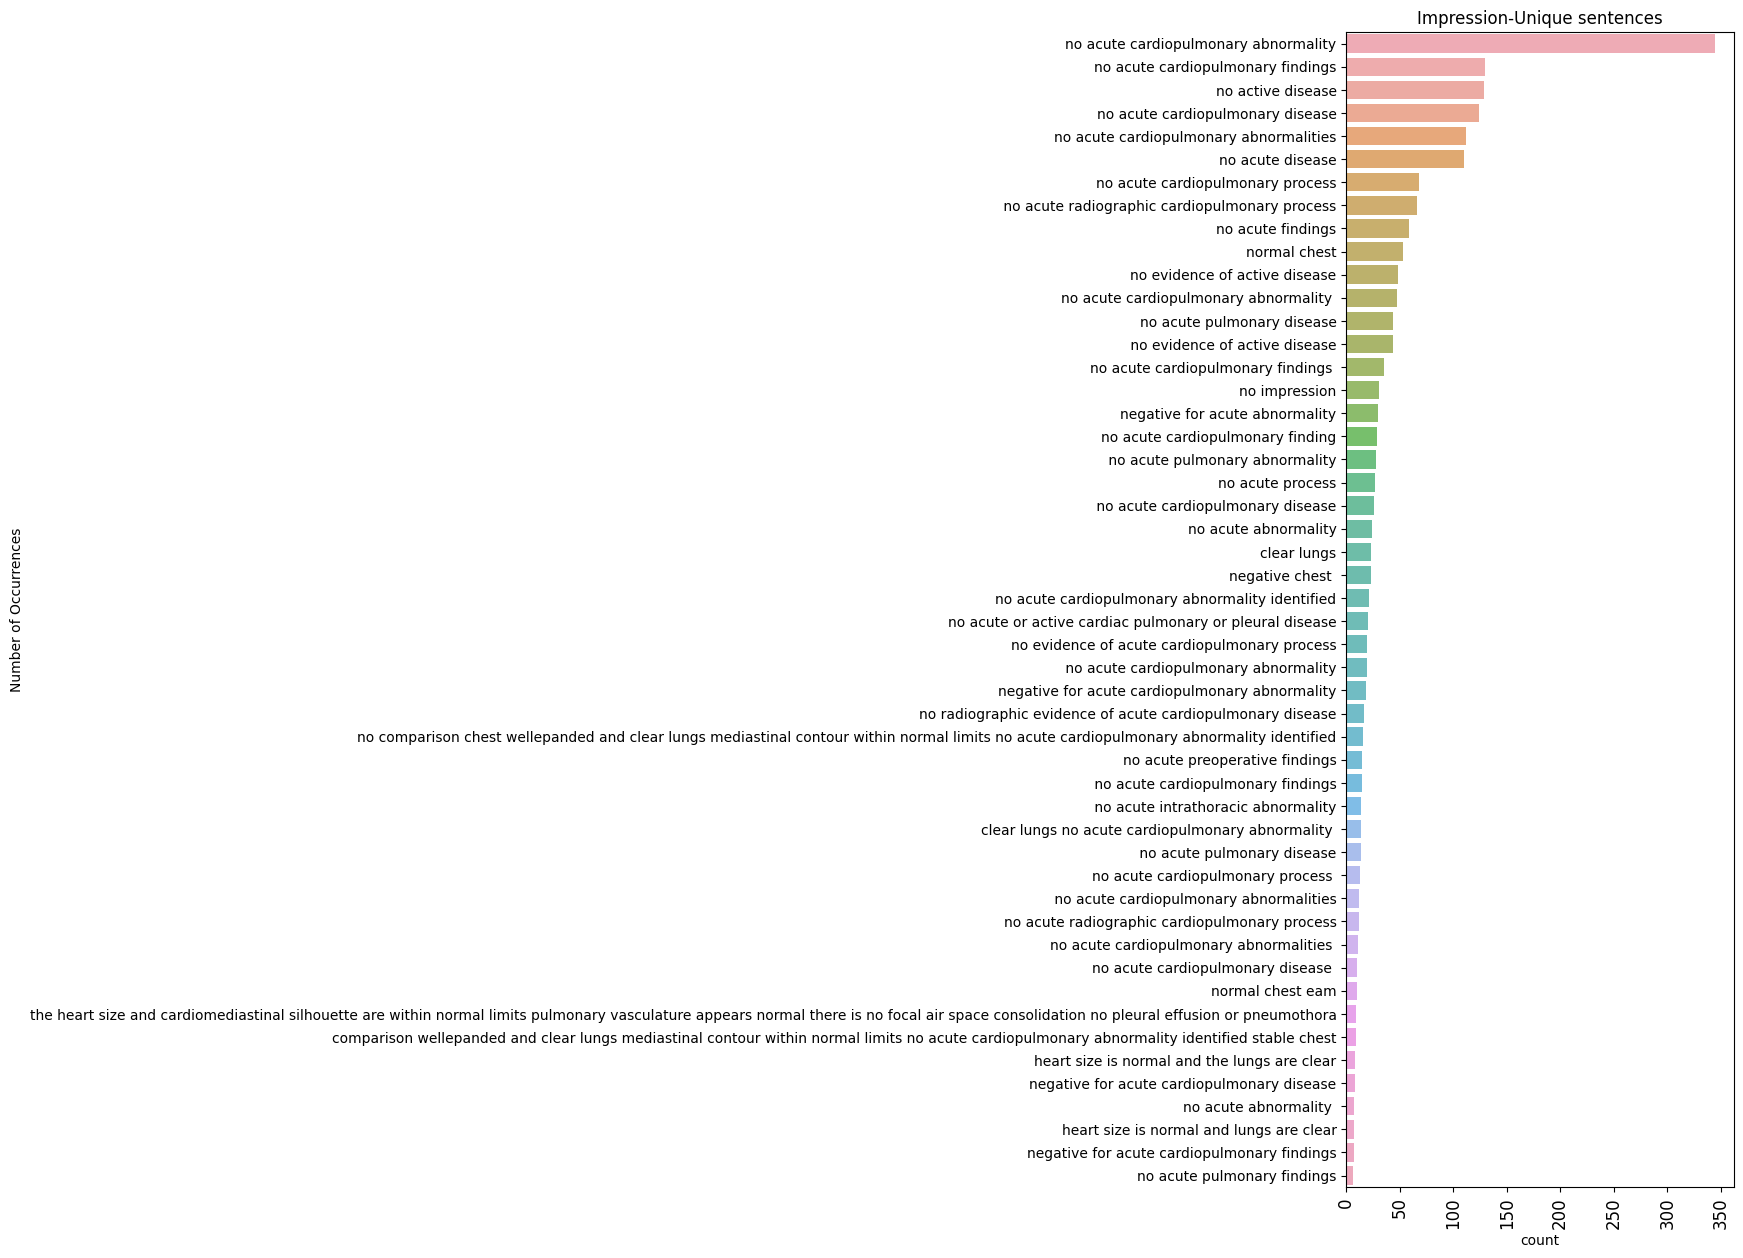

In [ ]:
sentences = report_df["impression"].value_counts()[:50].reset_index()
sentences.columns = ["impression", "count"]

plt.figure(figsize=(5, 15))
sns.barplot(data=sentences, y="impression", x="count", alpha=0.8, orient="h")
plt.ylabel("Number of Occurrences", fontsize=10)
plt.xticks(fontsize="large", rotation=90)
plt.title("Impression-Unique sentences")
plt.show()

Построим WordCloud

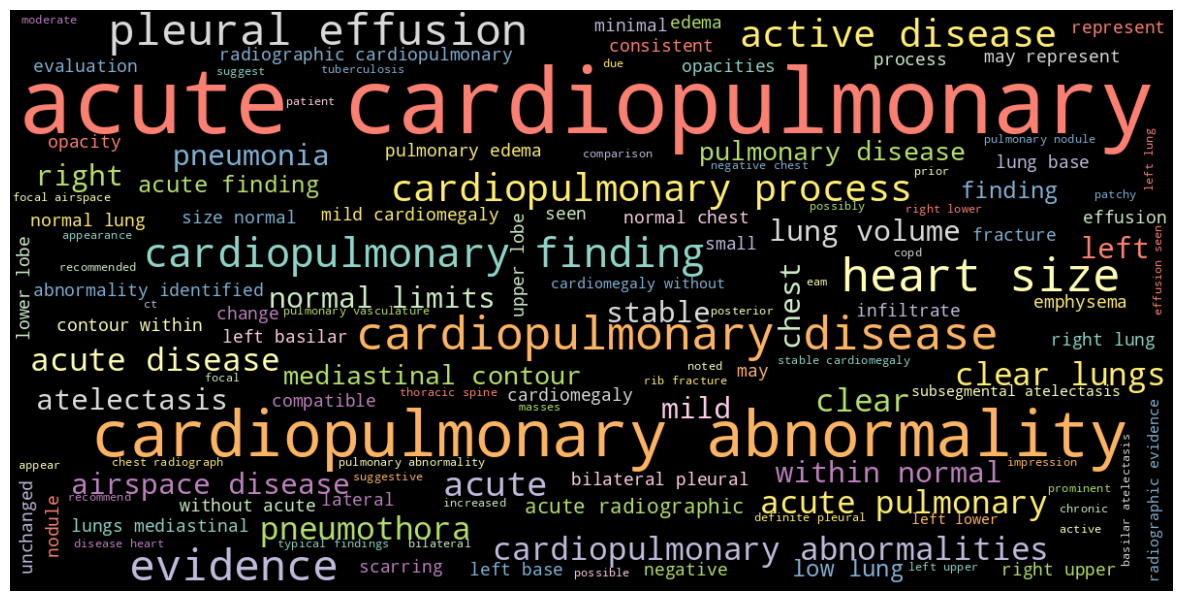

In [ ]:
show_wordcloud(report_df["impression"])

Из wordcloud: actue cardiopulmonary, cardiopulmonary abnormality, disease acute, heart size самые важные и частовстречающиеся слова

<h2>Анализ уникальных/повторяющихся слов в признаках

In [ ]:
def unique_words_features(df):
    '''This function takes pandas dataframe and show barplot of features unique and repeated words
       Input  =  pandas dataframe or numpy arrays
       Output =  barplot of the unique words of dataframe '''

    #length of the feature
    len_total = len(df.tolist())

    #length of unique words in the featue
    len_unique = len(np.unique(df.tolist()))

    x = ["Total Values", "Unique Values"]
    y = [len_total, len_unique]

    plt.bar(x, y, color = ["orange", "Teal"])
    plt.ylabel("Word-Count")
    for index, data in enumerate(y):
        plt.text(x=index, y=data + 1, s=f"{data}", fontdict=dict(fontsize=15))

    plt.ylabel("Word-Count")

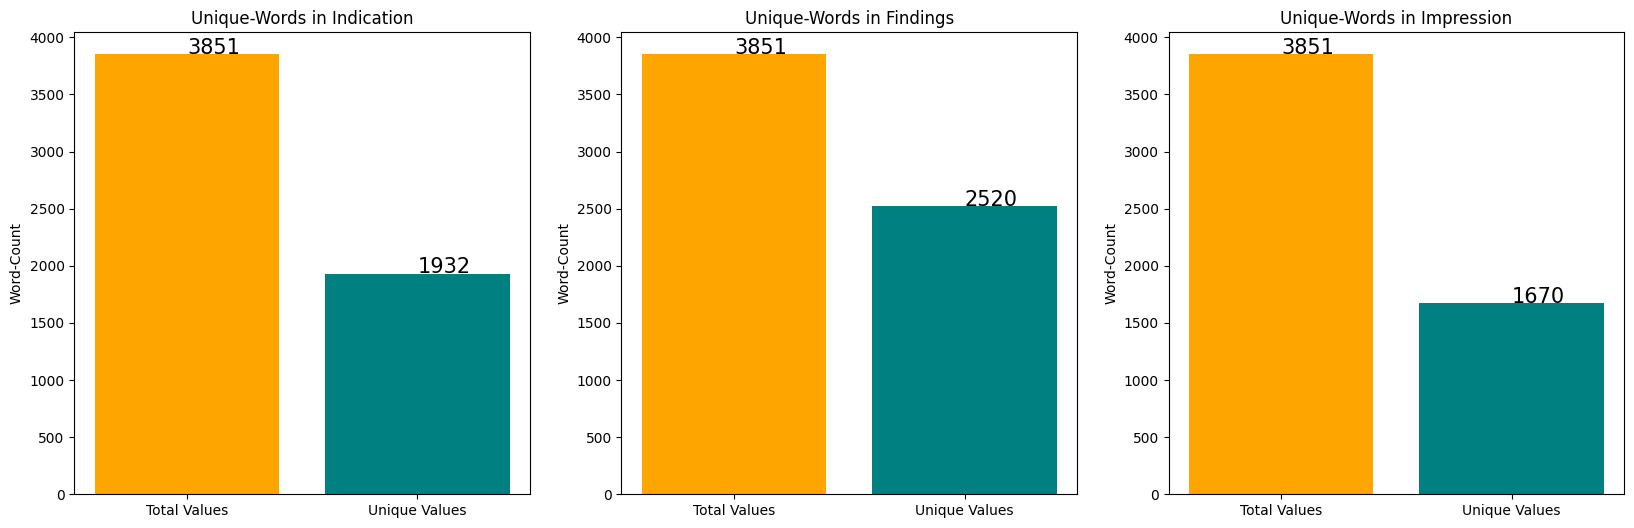

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
unique_words_features(report_df["indication"])
plt.title("Unique-Words in Indication")

plt.subplot(132)
unique_words_features(report_df["findings"])
plt.title("Unique-Words in Findings")

plt.subplot(133)
unique_words_features(report_df["impression"])
plt.title("Unique-Words in Impression")

plt.show()

**Indications** содержит 1932 уникальных слова в наборе данных

**Findings** содержит 2520 уникальных слов в наборе данных

**Impression** содержит 1670 уникальных слова в наборе данных

<h2>Построение функции плотности вероятности (PDF, Probability density function) и кумулятивной функции распределения (CDF, Cumulative distribution function) для распределения word_count признака:

<h3>Indication

Сначала добавим в pd.DataFrame столбцы с количеством слов в каждой записи

In [ ]:
report_df["indication_count"] = report_df["indication"].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
report_df["findings_count"] = report_df["findings"].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
report_df["impression_count"] = report_df["impression"].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
report_df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression,indication_count,findings_count,impression_count
0,1,normal,normal,ray chest pa lateral,positive tb test,none,cardiac silhouette mediastinum size within nor...,normal chest,3,19,2
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,chest views frontal lateral,preop bariatric surgery,none,borderline cardiomegaly midline sternotomy enl...,no acute pulmonary findings,3,10,4
2,3,normal,normal,ray chest pa lateral,rib pain steps pain r back r elbow r rib no pr...,no comparison,no findings,no displaced rib fractures pneumothora pleural...,19,2,21
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...",pa lateral views chest hours,,none available,diffuse bilateral interstitial alveolar opacit...,bullous emphysema interstitial fibrosis probab...,0,40,33
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,ray chest pa lateral,chest nasal congestion,no comparison,cardiomediastinal silhouette pulmonary vascula...,no acute cardiopulmonary abnormality,3,29,4


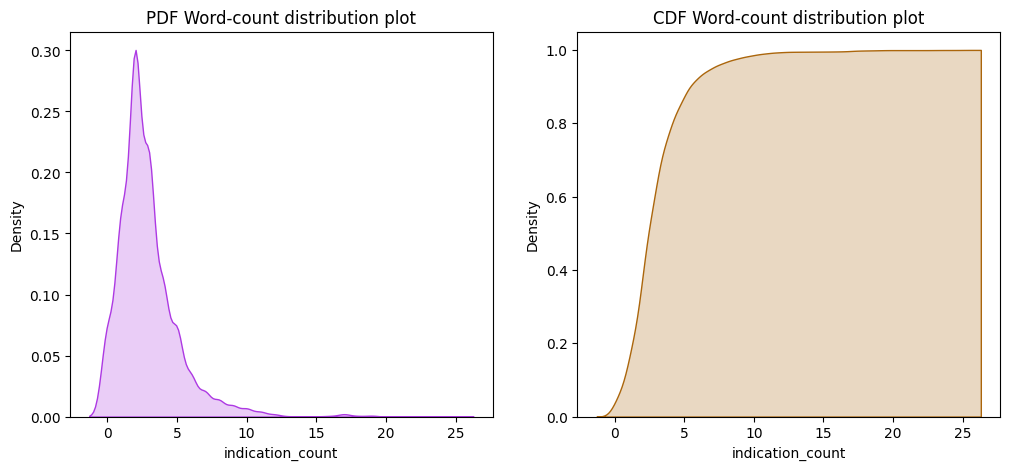

In [ ]:
plt.figure(figsize=(12, 5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(report_df["indication_count"], fill=True, color="#ad39e3")
plt.title("PDF Word-count distribution plot")

# Seaborn CDF
plt.subplot(122)
sns.kdeplot(report_df["indication_count"], fill=True, cumulative=True, color="#ab660c")
plt.title("CDF Word-count distribution plot")
plt.show()

Рисунок 1: Согласно приведенному графику, более 40% слов имеют длину 2-5, а 5% —  5-10. Лишь несколько слов имеют длину более 12 слов.

Рисунок 2. Как видно из приведенного графика, 50% данных призрака indication содержат 7-8 слов, а 99% текстовых данных имеют менее 10 слов в каждой строке. Только 1% данных имеют длину больше десяти.

<h3>Findings

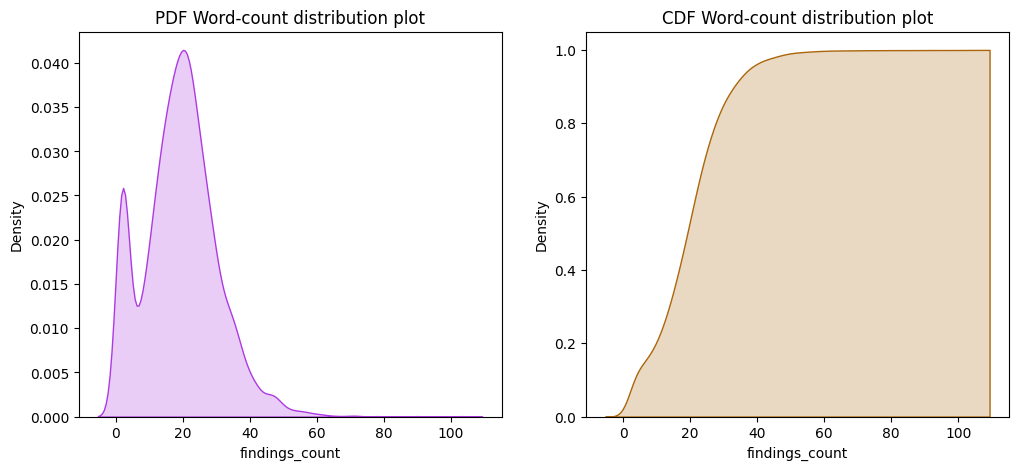

In [ ]:
plt.figure(figsize=(12, 5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(report_df["findings_count"], fill=True, color="#ad39e3")
plt.title("PDF Word-count distribution plot")

# Seaborn CDF
plt.subplot(122)
sns.kdeplot(report_df["findings_count"], fill=True, cumulative=True, color="#ab660c")
plt.title("CDF Word-count distribution plot")
plt.show()

Рисунок 1. Длина 90% данных варьируется от 5 до 40 слов на каждый finding. Некоторая информация более "плотная" в 2-15 слов, в 15-30 слов плотность контента превышает 0.025, а несколько записей превышают 80 слов

Рисунок 2: показывает, что некоторые findings превышают 80 слов на каждый finding. В 50% данных на каждый findings приходится менее 20 слов, а в 99% данных — приходится менее 48 слов

<h3> Impression

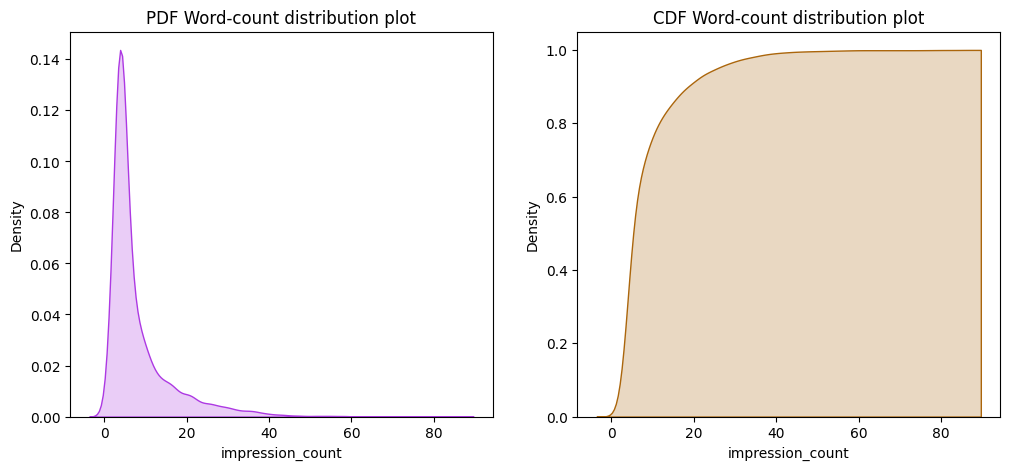

In [ ]:
plt.figure(figsize=(12, 5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(report_df["impression_count"], fill=True, color="#ad39e3")
plt.title("PDF Word-count distribution plot")

# Seaborn CDF
plt.subplot(122)
sns.kdeplot(report_df["impression_count"], fill=True, cumulative=True, color="#ab660c")
plt.title("CDF Word-count distribution plot")
plt.show()

Рисунок 1: Исходя из приведенного графика, можно сделать вывод, что 50% текстовых данных имеют длину 2-15, а 90% - 2-20. В записях impression чаще встречаются слова длиной 2-10

Figure 2: In 99% of cases, the number of words per impression is less than 39.Only a few impressions have fewer words than 50% of the data, implying that only a few impressions have fewer words.

Рисунок 2: В 99% случаев количество слов в одном impression меньше 39. Только в нескольких impression меньше слов, чем в 50% данных


<h2> Распределение слов

Findings

count    3851.000000
mean       19.186705
std        11.066913
min         1.000000
25%        12.000000
50%        19.000000
75%        25.000000
max       103.000000
Name: findings_count, dtype: float64

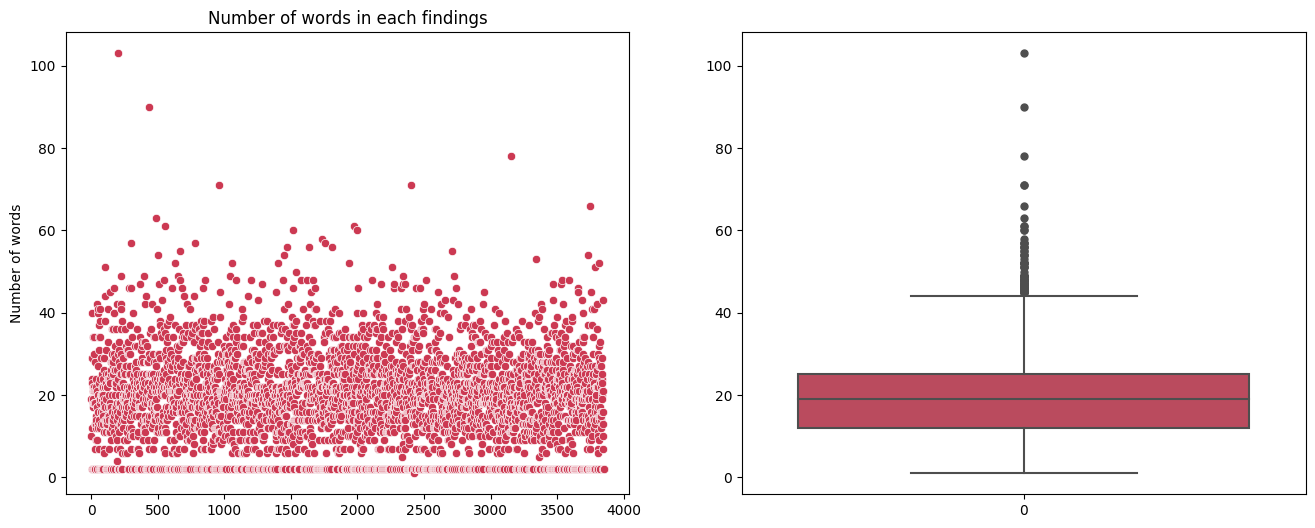

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.title("Number of words in each findings")
sns.scatterplot(data=report_df, x=range(report_df.shape[0]), y=report_df["findings_count"], color="#cc3952")
plt.ylabel("Number of words")

plt.subplot(122)
sns.boxplot(report_df["findings_count"], flierprops={"marker": "o"}, color="#cc3952")

report_df["findings_count"].describe()

count    3851.000000
mean        8.160737
std         8.048836
min         1.000000
25%         4.000000
50%         4.000000
75%         9.000000
max        85.000000
Name: impression_count, dtype: float64

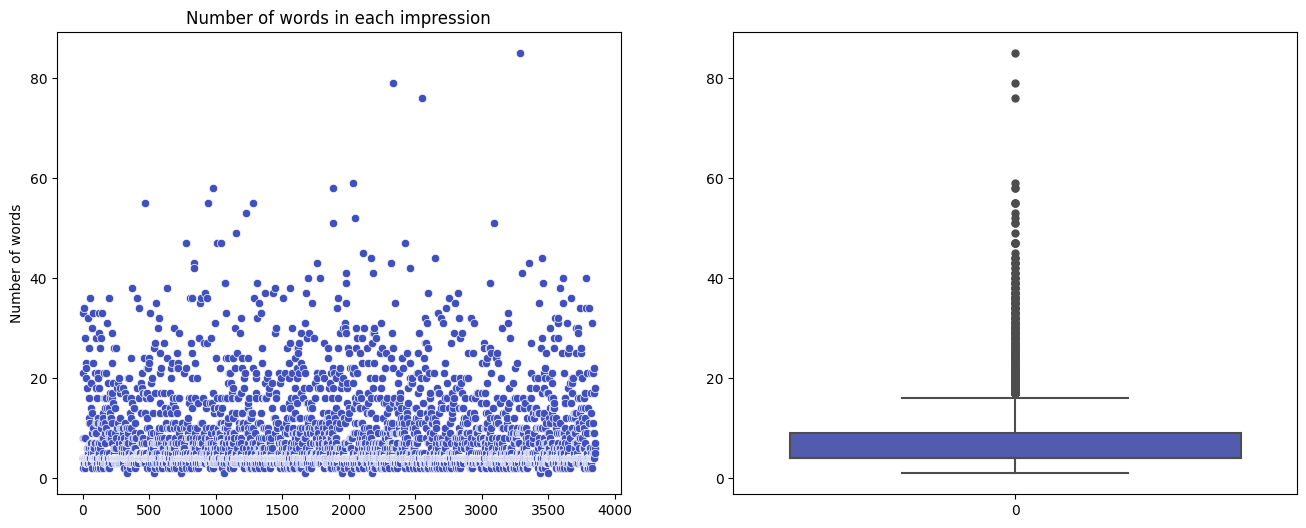

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.title("Number of words in each impression")
sns.scatterplot(data=report_df, x=range(report_df.shape[0]), y=report_df["impression_count"], color="#4150bf")
plt.ylabel("Number of words")

plt.subplot(122)
sns.boxplot(report_df["impression_count"], flierprops={"marker": "o"}, color="#4150bf")

report_df["impression_count"].describe()

count    3851.000000
mean        2.882109
std         2.245600
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        25.000000
Name: indication_count, dtype: float64

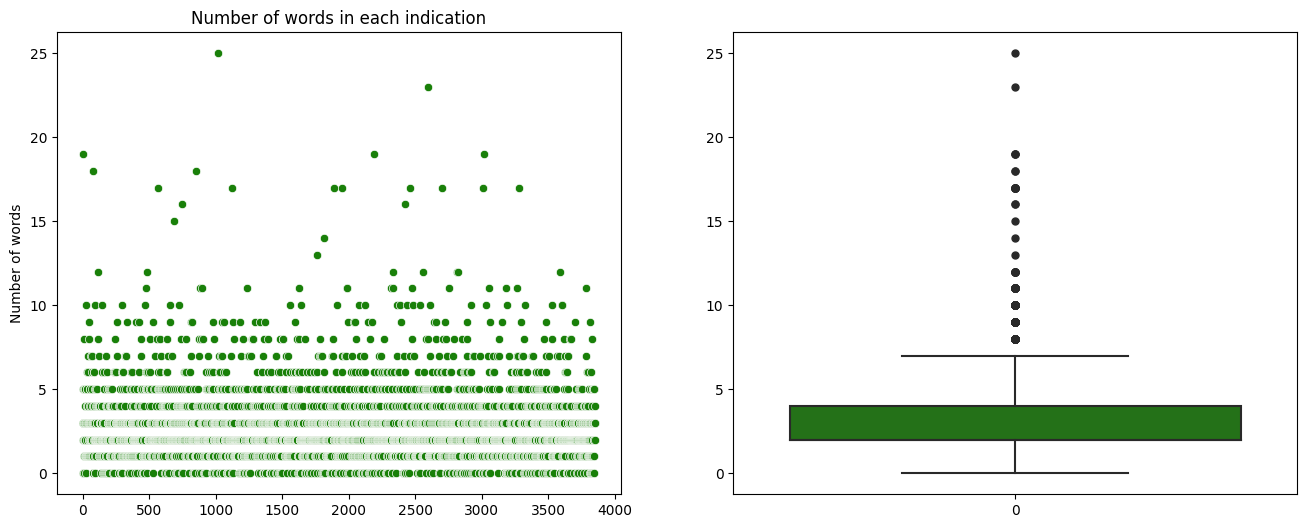

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.title("Number of words in each indication")
sns.scatterplot(data=report_df, x=range(report_df.shape[0]), y=report_df["indication_count"], color="#198009")
plt.ylabel("Number of words")

plt.subplot(122)
sns.boxplot(report_df["indication_count"], flierprops={"marker": "o"}, color="#198009")

report_df["indication_count"].describe()